# Summary
Trajectory inference
1. Load and format data for `slingshot`
2. Run `slingshot`
3. Plot `slingshot` lineages and curves

### Load libraries

In [1]:
library(Seurat)
library(slingshot)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: princurve

Loading required package: TrajectoryUtils

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    co

## 1. Load and format data for `slingshot`

### Load Seurat object

In [2]:
seurat_object <- readRDS("../2-integration_and_clustering/out/seurat/all_seurat.rds")

### Convert Seurat object to Single Cell Experiment object

In [3]:
sce <- as.SingleCellExperiment(seurat_object, assay = "RNA")

## 2. Run `slingshot`

In [4]:
sce <- slingshot(
  data = sce,
  clusterLabels = "integrated_snn_res.0.22",
  reducedDim = "UMAP",
  start.clus = "7",
  end.clus = c("1", "6", "5")
)

### Inspect `Slingshot` results

In [5]:
slingLineages(sce)

$Lineage1
[1] "7" "2" "4" "3" "6"

$Lineage2
[1] "7" "2" "4" "3" "1"

$Lineage3
[1] "7" "2" "4" "5"

$Lineage4
[1] "7" "2" "0"

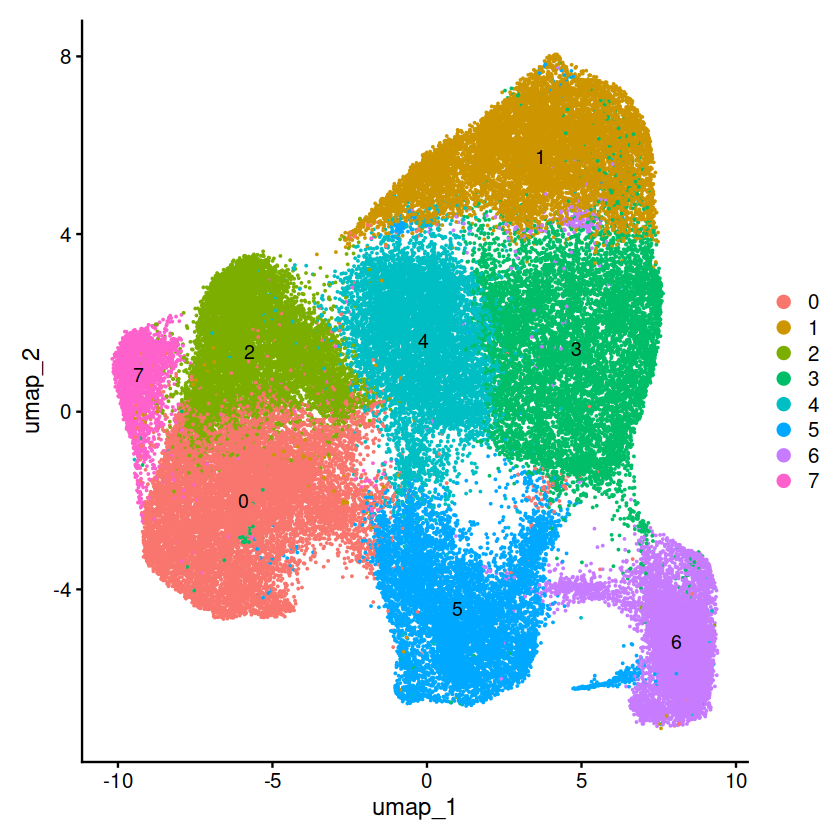

In [6]:
DimPlot(seurat_object, label = TRUE)

## 3. Plot `slingshot` lineages and curves

### Calculate coordinates of cluster centers

In [7]:
df <- as.data.frame(reducedDims(sce)$UMAP)
df$clusters <- sce[["integrated_snn_res.0.22"]]
colors <- c(
  "#F8766D",
  "#DB8E00",
  "#64B200",
  "#00BD5C",
  "#00C1A7",
  "#00BADE",
  "#B385FF",
  "#EF67EB"
)
cluster_colors <- colors[as.numeric(Idents(seurat_object))]
centroids <- aggregate(. ~ clusters, data = df, FUN = mean)

### Plot lineages

In [20]:
pdf("out/lineages/slingshot_lineages.pdf", width = 8, height = 8)
#png("out/lineages/slingshot_lineages.png", width = 8 * 300, height = 8 * 300, units = "px", res = 300)
curve_colors <- c("Black", "Red", "Blue", "Brown")
plot(
  reducedDims(sce)$UMAP,
  pch = 16,
  asp = 1.3,
  col = cluster_colors,
  cex = 0.15,
  bty = "l",
  xlim = c(-10, 10),
  ylim = c(-8, 8)
)
lines(SlingshotDataSet(sce), col = curve_colors, type = "lineages")
text(
  x = centroids$umap_1,
  y = centroids$umap_2,
  labels = centroids$clusters,
  col = "White",
  cex = 1,
  font = 2
)
mtext("Slingshot lineages", side = 3, line = 1, adj = 0, cex = 1.75)
dev.off()

pdf 
  2

### Plot curves

In [22]:
#pdf("out/curves/slingshot_curves.pdf", width = 8, height = 8)
png("out/curves/slingshot_curves.png", width = 8 * 300, height = 8 * 300, units = "px", res = 300)
curve_colors <- c("Black", "Red", "Blue", "Brown")
plot(
  reducedDims(sce)$UMAP,
  pch = 16,
  asp = 1.3,
  col = cluster_colors,
  cex = 0.15,
  bty = "l",
  xlim = c(-10, 10),
  ylim = c(-8, 8)
)
lines(SlingshotDataSet(sce), col = curve_colors, lwd = 4)
legend("topleft", legend = c("Lineage 1", "Lineage 2", "Lineage 3", "Lineage 4"),
       col = curve_colors, lty = 1, cex = 1.5, bty = "n", inset = 0.05,
       lwd = 3)
text(
  x = centroids$umap_1,
  y = centroids$umap_2,
  labels = centroids$clusters,
  col = "Black",
  cex = 1.5,
  font = 2
)
mtext("Slingshot curves", side = 3, line = 1, adj = 0, cex = 1.75)
dev.off()

pdf 
  2

### Save `slingshot` object

In [21]:
saveRDS(sce, "out/slingshot/slingshot_all.rds")